# SCNA analysis step 5: plot event locations

Using the event tables created in the last step, create  graphs to visualize where the various events are. First load all the tables and concatenate them together (with cancer type column). Start by making 2 graphs:

* whole chromsome gains
* whole chromsome losses

Next remove any rows that include chromsome level events (whole chromsome loss or gain). This will make sure we are not including whole chromosome events when we are looking at arm level events. Then we can make 4 additional graphs:

* p-arm gains
* p-arm losses
* q-arm gains
* q-arm losses

Each of the above mentioned graphs will be a barplot with chromosome on the x-axis, number of patients with the event on the y-axis, and cancer type as the hue.

## Setup

In [115]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
CUTOFF_VALUE = 25

## Load data

In [117]:
cancer_types = [
    "brca",
    "ccrcc",
    "colon",
    "endometrial",
    "gbm",
    "hnscc",
    "lscc",
    "luad",
    "ovarian"
]

In [118]:
events_dir = "event_tables"
event_info = pd.DataFrame()

for cancer_type in cancer_types:
    file_path = os.path.join(events_dir, f'{cancer_type}_event_table.tsv.gz')
    df = pd.read_csv(file_path, sep='\t').\
        assign(cancer_type=cancer_type)
    event_info = event_info.append(df)

In [119]:
chromosome_order = ['1', '2', '3', '4' ,'5','6', '7' ,'8' ,'9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y']

In [120]:
event_info.chromosome = event_info.chromosome.apply(lambda x: str(x))

In [121]:
event_info_chromo_gain = event_info[event_info.chromosome_gain]
event_info_chromo_gain = event_info_chromo_gain.groupby(['cancer_type','chromosome']).agg("count")
event_info_chromo_gain = event_info_chromo_gain[event_info_chromo_gain.chromosome_gain > CUTOFF_VALUE]
event_info_chromo_gain.reset_index(inplace=True)

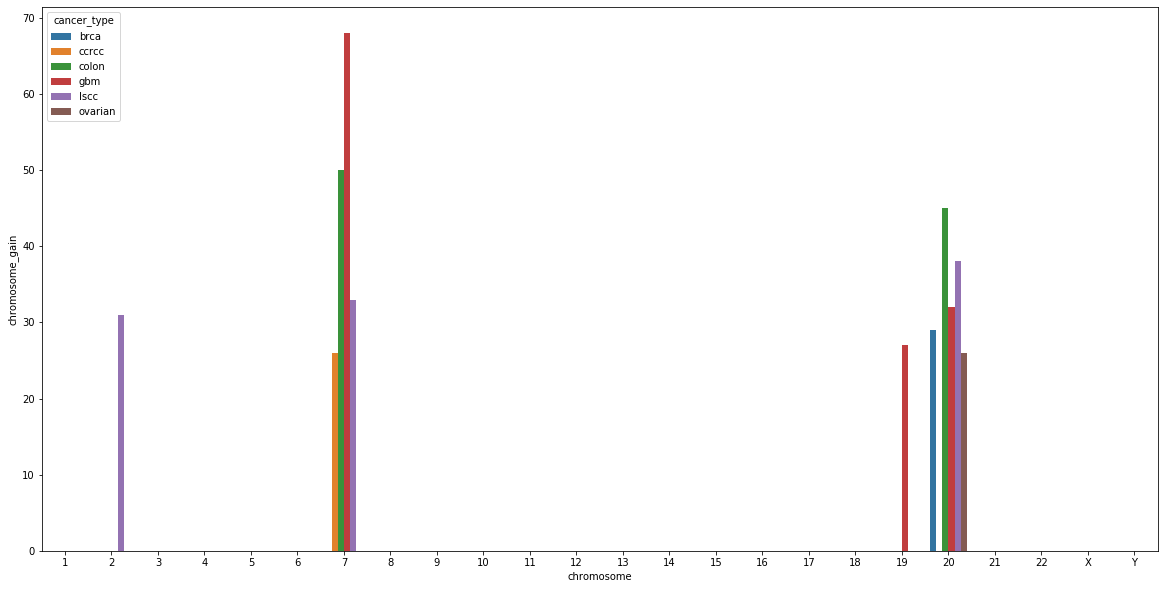

In [122]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='chromosome', y="chromosome_gain", hue='cancer_type', data=event_info_chromo_gain, order=chromosome_order, ax=ax)

In [123]:
event_info_chromo_loss = event_info[event_info.chromosome_loss]
event_info_chromo_loss = event_info_chromo_loss.groupby(['cancer_type','chromosome']).agg("count")
event_info_chromo_loss = event_info_chromo_loss[event_info_chromo_loss.chromosome_loss > CUTOFF_VALUE]
event_info_chromo_loss.reset_index(inplace=True)

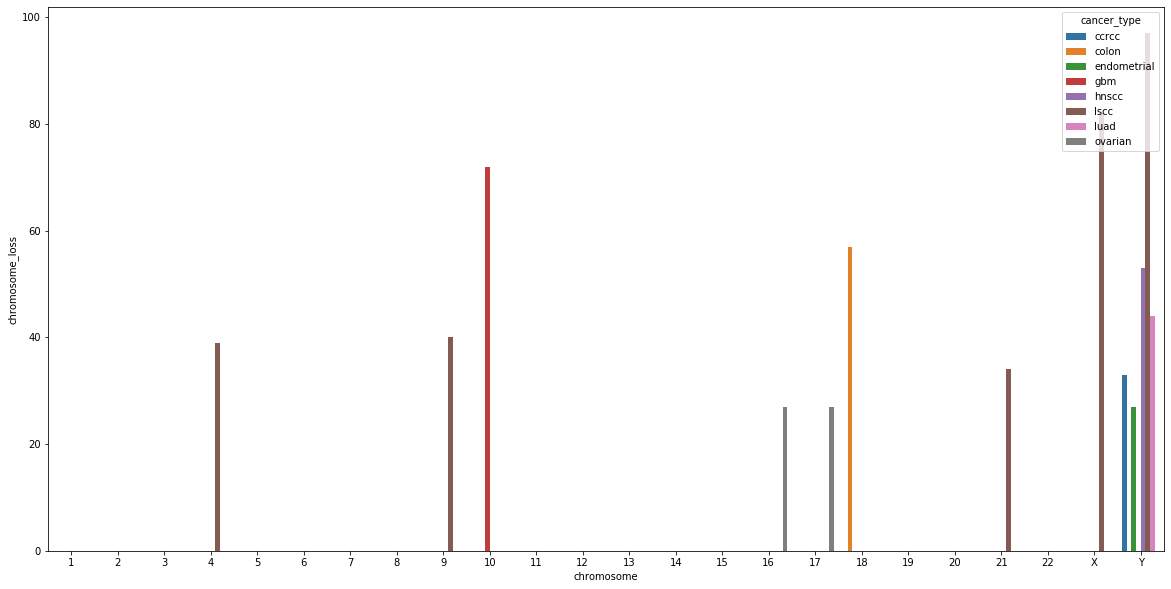

In [124]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='chromosome', y='chromosome_loss', hue='cancer_type', data=event_info_chromo_loss, order=chromosome_order, ax=ax)

In [125]:
# Remove all whole chromosome events.
event_info_arm = event_info[[not x for x in event_info.chromosome_loss]]
event_info_arm = event_info_arm[[not x for x in event_info_arm.chromosome_gain]]

In [126]:
event_info_p_arm_loss = event_info_arm[event_info_arm.p_loss]
event_info_p_arm_loss = event_info_p_arm_loss.groupby(['cancer_type','chromosome']).agg("count")
event_info_p_arm_loss = event_info_p_arm_loss[event_info_p_arm_loss.p_loss > CUTOFF_VALUE]
event_info_p_arm_loss.reset_index(inplace=True)

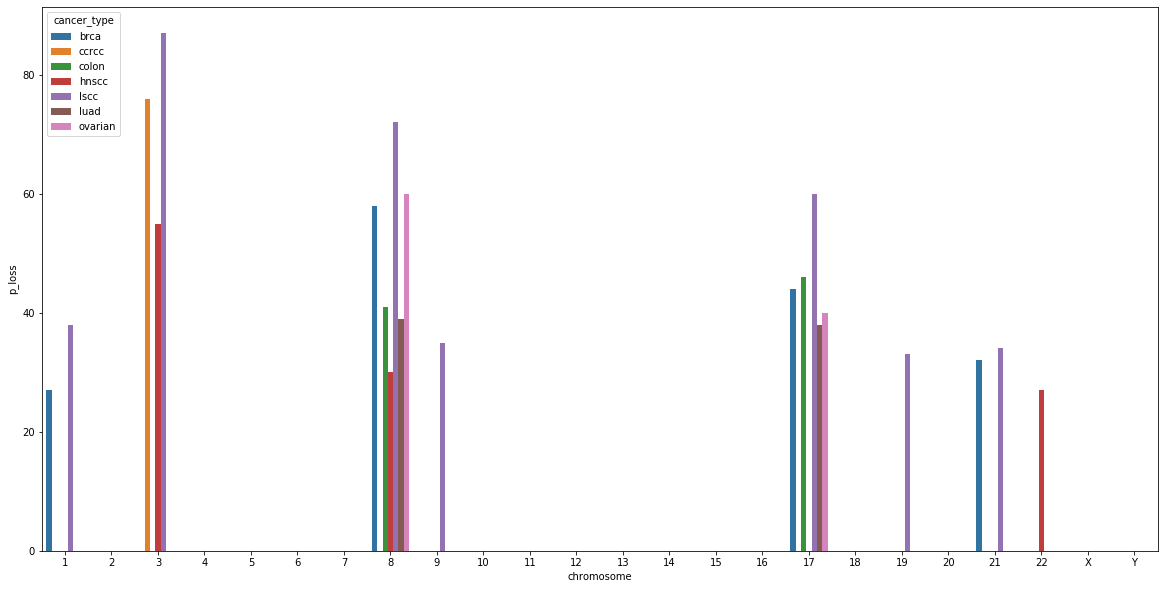

In [127]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='chromosome', y='p_loss', hue='cancer_type', data=event_info_p_arm_loss, order=chromosome_order, ax=ax)

In [128]:
event_info_q_arm_loss = event_info_arm[event_info_arm.q_loss]
event_info_q_arm_loss = event_info_q_arm_loss.groupby(['cancer_type','chromosome']).agg("count")
event_info_q_arm_loss = event_info_q_arm_loss[event_info_q_arm_loss.q_loss > CUTOFF_VALUE]
event_info_q_arm_loss.reset_index(inplace=True)

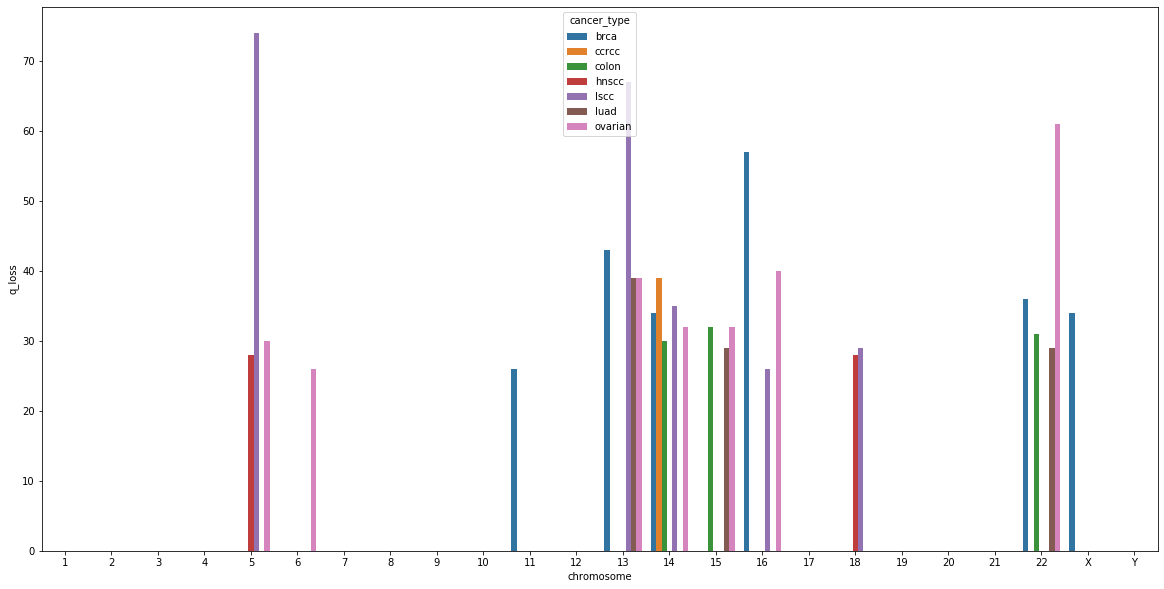

In [129]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='chromosome', y='q_loss', hue='cancer_type', data=event_info_q_arm_loss, order=chromosome_order, ax=ax)

In [130]:
event_info_p_arm_gain = event_info_arm[event_info_arm.p_gain]
event_info_p_arm_gain = event_info_p_arm_gain.groupby(['cancer_type','chromosome']).agg("count")
event_info_p_arm_gain = event_info_p_arm_gain[event_info_p_arm_gain.p_gain > CUTOFF_VALUE]
event_info_p_arm_gain.reset_index(inplace=True)

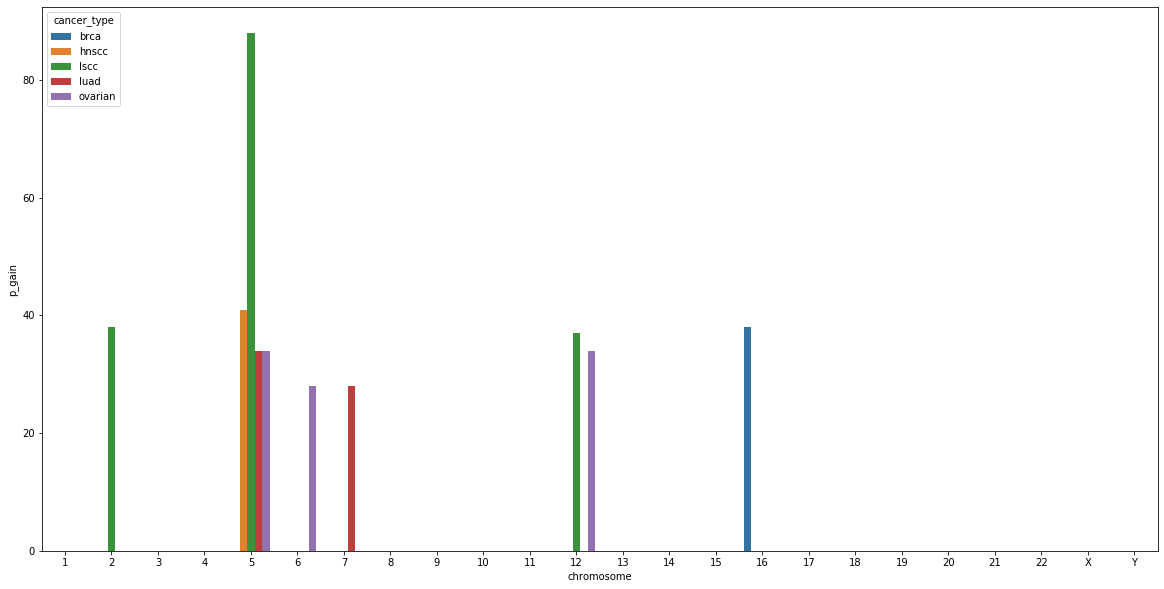

In [131]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='chromosome', y='p_gain', hue='cancer_type', data=event_info_p_arm_gain, order=chromosome_order, ax=ax)

In [132]:
event_info_q_arm_gain = event_info_arm[event_info_arm.q_gain]
event_info_q_arm_gain = event_info_q_arm_gain.groupby(['cancer_type','chromosome']).agg("count")
event_info_q_arm_gain = event_info_q_arm_gain[event_info_q_arm_gain.q_gain > CUTOFF_VALUE]
event_info_q_arm_gain.reset_index(inplace=True)

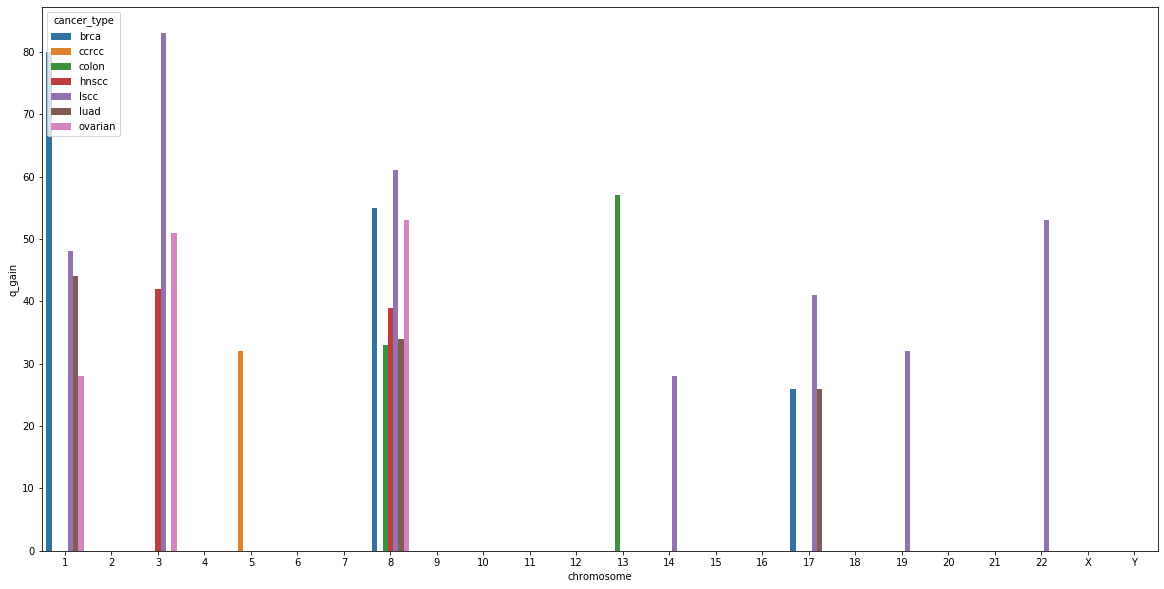

In [133]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='chromosome', y='q_gain', hue='cancer_type', data=event_info_q_arm_gain, order=chromosome_order, ax=ax)